In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

Challenge 1
Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.


In [3]:
download = True

if download:
    dates = ['180922', '180915', '180908', '180901']
    
    mta_dfs = []
    
    for this_date in dates:
        url = f'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{this_date}.txt'
        print(f'downloading {url}')
        
        mta_dfs.append(
            pd.read_csv(url)
        )

    df_mta = pd.concat(mta_dfs)
    df_mta.to_csv('turnstile_backup.csv')
else:
    df_mta = pd.read_csv('turnstile_backup.csv', index_col=0)


downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180922.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180915.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180908.txt
downloading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180901.txt


In [4]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


Challenge 2
Let's turn this into a time series.
Create a new column that specifies the date and time of each entry.

You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. 

In [5]:
df_mta['DATETIME'] = df_mta['DATE'] + ' ' + df_mta['TIME']
df_mta['DATETIME']= pd.to_datetime(df_mta['DATETIME'],format="%m/%d/%Y %H:%M:%S")
#df_mta.drop('date_time', axis=1, inplace=True)

In [6]:
df_mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425,2018-09-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429,2018-09-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453,2018-09-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532,2018-09-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574,2018-09-15 16:00:00


In [17]:
df_mta.columns = df_mta.columns.str.strip()

Challenge 3
These counts are for every n hours. (What is n?) We want total daily entries.
Calculate to total daily entries for each turnstile.

Your result should be a new data frame that has the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.


In [36]:
df_mta_daily_entries = df_mta.groupby(['C/A', 'SCP', 'STATION', 'DATE'])['ENTRY_DIFF'].sum().reset_index()
df_mta_daily_entries.head()

,C/A,SCP,STATION,DATE,ENTRY_DIFF
0,A002,02-00-00,59 ST,08/25/2018,616.0
1,A002,02-00-00,59 ST,08/26/2018,453.0
2,A002,02-00-00,59 ST,08/27/2018,1294.0
3,A002,02-00-00,59 ST,08/28/2018,1374.0
4,A002,02-00-00,59 ST,08/29/2018,1261.0


In [40]:
df_single_SCP = df_mta_daily_entries[(df_mta_daily_entries['C/A'] == 'N094')
                                     & (df_mta_daily_entries['SCP'] == '01-00-00')]
df_single_SCP.head()

,C/A,SCP,STATION,DATE,ENTRY_DIFF
37553,N094,01-00-00,WORLD TRADE CTR,08/25/2018,888.0
37554,N094,01-00-00,WORLD TRADE CTR,08/26/2018,650.0
37555,N094,01-00-00,WORLD TRADE CTR,08/27/2018,1536.0
37556,N094,01-00-00,WORLD TRADE CTR,08/28/2018,1716.0
37557,N094,01-00-00,WORLD TRADE CTR,08/29/2018,1644.0


Challenge 4
Now plot the daily time series for a turnstile.

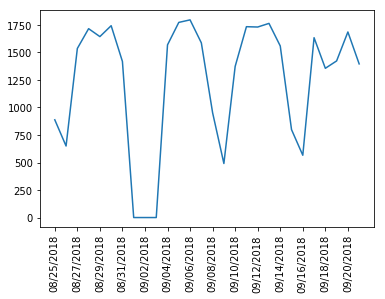

In [42]:
x = df_single_SCP.DATE; y = df_single_SCP.ENTRY_DIFF
plt.plot(x, y)
plt.xticks(range(0, len(x), 2), df_single_SCP.DATE[::2], rotation=90)
plt.show()

Challenge 5
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [43]:
df_mta['C/A_UNIT_SCP'] = df_mta['C/A']+df_mta['UNIT']+df_mta['SCP']

In [51]:
df_mta_combo = df_mta.groupby(['C/A_UNIT_SCP', 'STATION', 'DATE'])['ENTRY_DIFF'].sum().reset_index()

In [52]:
df_mta_combo.head()

,C/A_UNIT_SCP,STATION,DATE,ENTRY_DIFF
0,A002R05102-00-00,59 ST,08/25/2018,616.0
1,A002R05102-00-00,59 ST,08/26/2018,453.0
2,A002R05102-00-00,59 ST,08/27/2018,1294.0
3,A002R05102-00-00,59 ST,08/28/2018,1374.0
4,A002R05102-00-00,59 ST,08/29/2018,1261.0


Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1 (date2,count2),...]
type of time series for each STATION, by adding up all the turnstiles in a station.

In [54]:
df_stat_tot = df_mta.groupby(['STATION','DATE'])['ENTRY_DIFF','EXIT_DIFF'].sum().reset_index()
df_stat_tot.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
0,1 AV,08/25/2018,14533.0,16209.0
1,1 AV,08/26/2018,12019.0,13560.0
2,1 AV,08/27/2018,17354.0,18948.0
3,1 AV,08/28/2018,17946.0,19716.0
4,1 AV,08/29/2018,18479.0,20566.0


Challenge 7
Plot the time series (either daily or your preferred level of granularity) for a station.

In [57]:
sing_WTC = df_stat_tot[(df_stat_tot['STATION'] == 'WORLD TRADE CTR')]
sing_WTC.head(5)

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
10370,WORLD TRADE CTR,08/25/2018,13362.0,14263.0
10371,WORLD TRADE CTR,08/26/2018,10194.0,11450.0
10372,WORLD TRADE CTR,08/27/2018,19041.0,15320.0
10373,WORLD TRADE CTR,08/28/2018,20813.0,16091.0
10374,WORLD TRADE CTR,08/29/2018,19697.0,15023.0


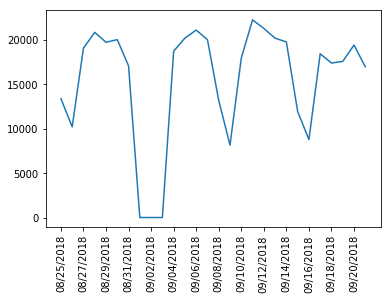

In [58]:
xx = sing_WTC.DATE; yy = sing_WTC.ENTRY_DIFF
plt.plot(xx, yy)
plt.xticks(range(0, len(x), 2), df_single_SCP.DATE[::2], rotation=90)
plt.show()

Challenge 8
Select a station and find the total daily counts for this station. Then plot those daily counts for each week separately.

To clarify: if I have 10 weeks of data on the 28th st 6 station, I will add 10 lines to the same figure (e.g. running plt.plot(week_count_list) once for each week). Each plot will have 7 points of data.

In [63]:
WTC_df = pd.DataFrame(sing_WTC)
WTC_df.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
10370,WORLD TRADE CTR,2018-08-25,13362.0,14263.0
10371,WORLD TRADE CTR,2018-08-26,10194.0,11450.0
10372,WORLD TRADE CTR,2018-08-27,19041.0,15320.0
10373,WORLD TRADE CTR,2018-08-28,20813.0,16091.0
10374,WORLD TRADE CTR,2018-08-29,19697.0,15023.0


In [67]:
WTC_df.loc[:, 'DATE'] = pd.to_datetime(WTC_df['DATE'])
WTC_df['DOW'] = WTC_df['DATE'].dt.dayofweek
WTC_df.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF,DOW
10370,WORLD TRADE CTR,2018-08-25,13362.0,14263.0,5
10371,WORLD TRADE CTR,2018-08-26,10194.0,11450.0,6
10372,WORLD TRADE CTR,2018-08-27,19041.0,15320.0,0
10373,WORLD TRADE CTR,2018-08-28,20813.0,16091.0,1
10374,WORLD TRADE CTR,2018-08-29,19697.0,15023.0,2


In [71]:
WTC_day = WTC_df.groupby(['DOW'])['ENTRY_DIFF','EXIT_DIFF'].sum().reset_index()

In [72]:
WTC_day

,DOW,ENTRY_DIFF,EXIT_DIFF
0,0,55368.0,44643.0
1,1,79091.0,63204.0
2,2,78669.0,59778.0
3,3,80603.0,62176.0
4,4,73714.0,57362.0
5,5,38455.0,40297.0
6,6,27099.0,31291.0


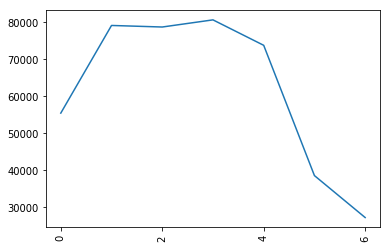

In [73]:
vv = WTC_day.DOW; ww = WTC_day.ENTRY_DIFF
plt.plot(vv, ww)
plt.xticks(range(0, len(vv), 2), WTC_day.DOW[::2], rotation=90)
#plt.xticks(('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), rotation=90)
plt.show()

Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate


In [74]:
df_stat_tot.head(5)

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
0,1 AV,08/25/2018,14533.0,16209.0
1,1 AV,08/26/2018,12019.0,13560.0
2,1 AV,08/27/2018,17354.0,18948.0
3,1 AV,08/28/2018,17946.0,19716.0
4,1 AV,08/29/2018,18479.0,20566.0


In [75]:
df_stat_tot = df_stat_tot.groupby(['STATION'])['ENTRY_DIFF'].sum().reset_index()
df_stat_tot.sort_values('ENTRY_DIFF',ascending=False,inplace=True)


In [78]:
df_stat_tot = df_mta.groupby(['STATION'])['ENTRY_DIFF',].sum().reset_index()
df_stat_tot.sort_values('ENTRY_DIFF',ascending=False,inplace=True)
df_stat_tot.head()

,STATION,ENTRY_DIFF
59,34 ST-PENN STA,3827660.0
229,GRD CNTRL-42 ST,3391850.0
57,34 ST-HERALD SQ,2863533.0
14,14 ST-UNION SQ,2473995.0
349,TIMES SQ-42 ST,2470139.0


Challenge 10
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

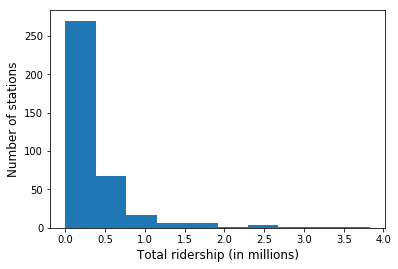

In [79]:
plt.hist(df_stat_tot['ENTRY_DIFF']/1e6);
plt.xlabel('Total ridership (in millions)',fontsize=12);
plt.ylabel('Number of stations',fontsize=12);